In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [2]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {
        'map_name': '4x4',
        'is_slippery': False
    }
)
env = gym.make('FrozenLake-v0')

In [3]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
#Discount factor
learning_late = .85
dis = 0.99
num_episodes = 2000

#create lists to contain total rewards and steps per episode
rList = []

In [4]:
for i in range(num_episodes):
    #Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    #The Q-Table learning algorithm
    while not done:
        #Choose an action by greedily  (with noise) picking from Q-table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        #Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        #Update Q-Table with new knowledge using decay rate
        Q[state, action] =(1 - learning_late) * Q[state, action] + learning_late * (reward + dis * np.max(Q[new_state, :]))
        
        rAll += reward
        state = new_state
    
    rList.append(rAll)

Success rate: 0.507
Final Q-Table Values
[[  6.80264561e-01   1.32945813e-02   1.09430471e-02   1.89197568e-02]
 [  0.00000000e+00   5.50536302e-03   7.33728746e-04   5.97302069e-01]
 [  3.92336239e-03   1.82486249e-02   4.65187706e-03   6.22753231e-01]
 [  5.64253297e-04   6.77920689e-04   3.30079093e-03   4.02998466e-01]
 [  7.92950120e-01   4.19637529e-03   2.33743750e-04   2.95471922e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.89941440e-01   3.01057988e-06   2.64328369e-04   2.11774815e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.49966320e-04   1.02678069e-03   1.08019368e-02   4.41891775e-01]
 [  1.26256539e-05   8.50940314e-01   3.08784000e-04   3.62821261e-04]
 [  4.07510412e-01   3.01905970e-04   5.57173998e-04   5.59110514e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00 

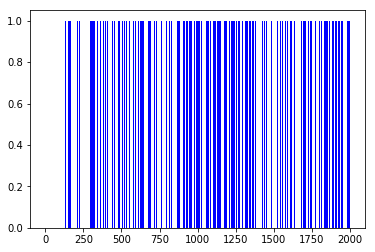

  (Up)
SFFF
FHFH
FFFH
HFFG


In [5]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()
env.render()